In [10]:
from pyimzml.ImzMLParser import ImzMLParser

p = ImzMLParser('../Data/LPS/Control1.imzml')
my_spectra = []
for idx, (x,y,z) in enumerate(p.coordinates):
    mzs, intensities = p.getspectrum(idx)
    my_spectra.append([mzs, intensities, (x, y, z)])

print(f"",len(my_spectra),"spectra found!")


 1636 spectra found!


c:\Users\mazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyimzml\ontology\ontology.py:80: UserWarning: Unrecognized accession in <cvParam>:  (name: "").
  warn('Unrecognized accession in <cvParam>: %s (name: "%s").' % (accession, raw_name))
c:\Users\mazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyimzml\ontology\ontology.py:92: UserWarning: Accession IMS:1000042 found with incorrect name "max count of pixel x". Updating name to "max count of pixels x".
  warn(
c:\Users\mazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyimzml\ontology\ontology.py:92: UserWarning: Accession IMS:1000043 found with incorrect name "max count of pixel y". Updating name to "max count of pixels y".
  warn(
c:\Users\mazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyimzml\ontology\ontology.py:92: UserWarning: Accession IMS:1000046 found with incorrect name "pixel size x". Updating name to "pixel size (x)".
  warn(


42 41
Points found 934


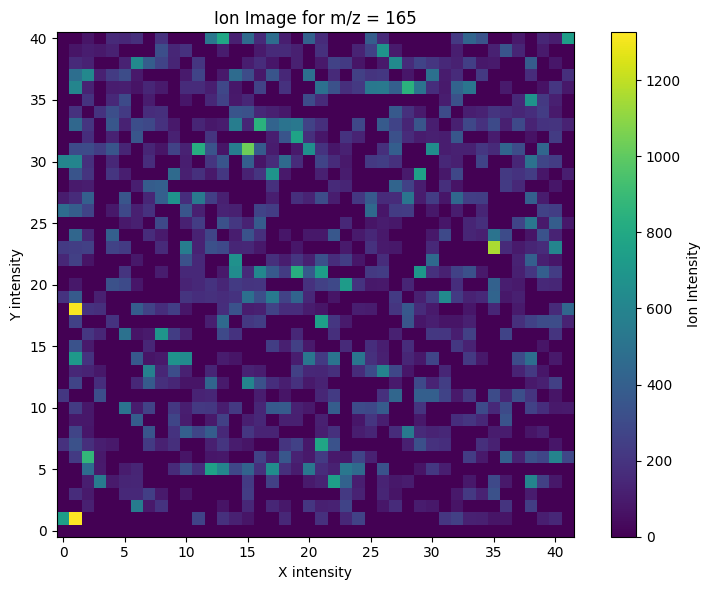

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# Choose the m/z you want to plot  and tolerance
target_mz = 165
tolerance = 0.02

# Get image dimensions
all_coords = [coord for _, _, coord in my_spectra]
xs, ys, _ = zip(*all_coords)
width = max(xs) + 1
height = max(ys) + 1
print(width,height)



# Create empty image
ion_image = np.zeros((height, width))

# Fill in the ion image with intensities for target m/z
times = 0 
for mzs, intensities, (x, y, _) in my_spectra:
    # Get mask of indices where mz is within target window
    mz_mask = (mzs >= target_mz - tolerance) & (mzs <= target_mz + tolerance)
    if np.any(mz_mask):
        times+=1
        ion_intensity = np.mean(intensities[mz_mask])
        ion_image[y, x] = ion_intensity
print(f"Points found", times)

# Plot the ion image
plt.figure(figsize=(8, 6))
plt.imshow(ion_image, cmap='viridis', origin='lower')
plt.colorbar(label='Ion Intensity')
plt.title(f"Ion Image for m/z = {target_mz}")
plt.xlabel("X intensity")
plt.ylabel("Y intensity")
plt.tight_layout()
plt.show()

In [12]:
import h5py
import hdf5plugin
import math
import numpy as np

f = h5py.File("../Data/LPS/Control1.h5",'r')   
h5_spectra = []

keys = list(f.keys())
for key in keys:
    h5_spectra.append([f.get(key)["x"][:],f.get(key)["y"][:]])
  

print("Done adding to array!") 
print(f"",len(h5_spectra),"spectra found!")
  

Done adding to array!
 1658 spectra found!


In [16]:
h5_spectra_coords= []
print(len(all_coords))
print(len(h5_spectra))
for spectrum_idx in range(len(h5_spectra)-22):
    # print(spectrum_idx)
    h5_spectra_coords.append([h5_spectra[spectrum_idx][0],h5_spectra[spectrum_idx][1],all_coords[spectrum_idx]])


1636
1658


Points found 923


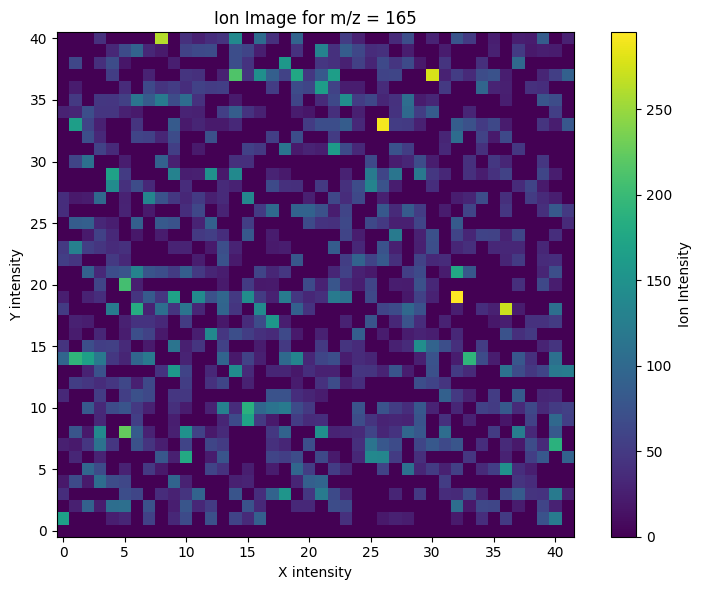

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# Choose the m/z you want to plot  and tolerance
target_mz = 165
tolerance = 0.02



# Create empty image
ion_image = np.zeros((height, width))

# Fill in the ion image with intensities for target m/z
times = 0 
for mzs, intensities, (x, y, _) in h5_spectra_coords:
    # Get mask of indices where mz is within target window
    mz_mask = (mzs >= target_mz - tolerance) & (mzs <= target_mz + tolerance)
    if np.any(mz_mask):
        times+=1
        ion_intensity = np.mean(intensities[mz_mask])
        ion_image[y, x] = ion_intensity
print(f"Points found", times)

# Plot the ion image
plt.figure(figsize=(8, 6))
plt.imshow(ion_image, cmap='viridis', origin='lower')
plt.colorbar(label='Ion Intensity')
plt.title(f"Ion Image for m/z = {target_mz}")
plt.xlabel("X intensity")
plt.ylabel("Y intensity")
plt.tight_layout()
plt.show()